In [108]:
from adata.stock import Stock
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [127]:
from database import Database
from crawler import Crawler
from api_source import TiingoApiSource, AshareApiSource
from datetime import datetime
from backend import Backend
from cert import TiingoKey
from main import *

import matplotlib.pyplot as plt
from frontend import Frontend


# Api Source

In [13]:
tiingo_source = TiingoApiSource(TiingoKey)
ashare_source = AshareApiSource()

START_DATE = '2000-01-01'
END_DATE = datetime.today().strftime('%Y-%m-%d')

In [14]:
data = tiingo_source.fetch_data('TSLA', START_DATE, END_DATE)

📡 [Tiingo] Fetching data for TSLA from 2000-01-01 to 2025-09-27...
✓ [Tiingo] Successfully fetched 3836 days of data


In [15]:
data = ashare_source.fetch_data('sh000001', START_DATE, END_DATE)

📡 [Sina] Fetching A-share data for sh000001 from 2000-01-01 to 2025-09-27...
📊 [Sina] Retrieved data from 2000-01-04 to 2025-09-26 (6239 days)
✓ [Sina] Successfully fetched 6239 trading days of data


In [16]:
data

,Open,High,Low,Close,Volume,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,Dividend,Split_Factor
date,,,,,,,,,,,,
2000-01-04,1368.693,1407.518,1361.214,1406.371,903402300,1368.693,1407.518,1361.214,1406.371,903402300,0.0,1.0
2000-01-05,1407.829,1433.780,1398.323,1409.682,1057998400,1407.829,1433.780,1398.323,1409.682,1057998400,0.0,1.0
2000-01-06,1406.036,1463.955,1400.253,1463.942,1348051500,1406.036,1463.955,1400.253,1463.942,1348051500,0.0,1.0
2000-01-07,1477.154,1522.825,1477.154,1516.604,3451569900,1477.154,1522.825,1477.154,1516.604,3451569900,0.0,1.0
2000-01-10,1531.712,1546.723,1506.404,1545.112,3125353900,1531.712,1546.723,1506.404,1545.112,3125353900,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-22,3822.010,3831.740,3806.202,3828.576,56832568600,3822.010,3831.740,3806.202,3828.576,56832568600,0.0,1.0
2025-09-23,3830.138,3838.606,3774.528,3821.833,70190286800,3830.138,3838.606,3774.528,3821.833,70190286800,0.0,1.0
2025-09-24,3804.483,3854.923,3804.328,3853.642,60205667000,3804.483,3854.923,3804.328,3853.642,60205667000,0.0,1.0


# Crawler



In [42]:
crawler = Crawler(TiingoApiSource(TiingoKey, quota_limit=40))

START_DATE = '2000-01-01'
END_DATE = datetime.today().strftime('%Y-%m-%d')
symbols = ['VXUS', 'VTI', 'GLD', 'IAU', 'SHY', 'IEF', 'TLT']

crawler.crawl(symbols, START_DATE, END_DATE, force=False)

✓ Crawler initialized with TiingoApiSource
✓ Data will be stored in: data/stock_data.pkl
🚀 Starting batch crawl for 7 symbols from 2000-01-01 to 2025-09-27
📦 Using batch size of 10 symbols per database write

📦 Processing batch 1/1 (7 symbols)
[1/7] Processing VXUS...
📂 Data loaded: 353917 rows
✓ Database initialized: 353917 rows from data/stock_data.pkl
📊 Insufficient data for VXUS (tiingo): 54.9% coverage (3688 days, missing 3027 days)
📡 [Tiingo] Fetching data for VXUS from 2000-01-01 to 2025-09-27...
✓ [Tiingo] Successfully fetched 3688 days of data
[2/7] Processing VTI...
📊 Found sufficient data for VTI (tiingo): 91.1% coverage (6118 days, missing 597 days)
✓ Data already exists for VTI, skipping
[3/7] Processing GLD...
📊 Insufficient data for GLD (tiingo): 78.1% coverage (5247 days, missing 1468 days)
📡 [Tiingo] Fetching data for GLD from 2000-01-01 to 2025-09-27...
✓ [Tiingo] Successfully fetched 5247 days of data
[4/7] Processing IAU...
📊 Insufficient data for IAU (tiingo): 77.4

'data/stock_data.pkl'

In [44]:
crawler = Crawler(AshareApiSource(quota_limit=100))

START_DATE = '2000-01-01'
END_DATE = datetime.today().strftime('%Y-%m-%d')
symbols = ['SH512170', 'SZ159766', 'SZ159855', 'SH588000', "SZ159869", 'SZ159936', 'SH510050', 'SH000001', 'SH000300']

crawler.crawl(symbols, START_DATE, END_DATE, force=False)

✓ Crawler initialized with AshareApiSource
✓ Data will be stored in: data/stock_data.pkl
🚀 Starting batch crawl for 9 symbols from 2000-01-01 to 2025-09-27
📦 Using batch size of 10 symbols per database write

📦 Processing batch 1/1 (9 symbols)
[1/9] Processing SH512170...
📂 Data loaded: 353917 rows
✓ Database initialized: 353917 rows from data/stock_data.pkl
📡 [Sina] Fetching A-share data for sh512170 from 2000-01-01 to 2025-09-27...
📊 [Sina] Retrieved data from 2019-06-17 to 2025-09-26 (1528 days)
✓ [Sina] Successfully fetched 1528 trading days of data
[2/9] Processing SZ159766...
📡 [Sina] Fetching A-share data for sz159766 from 2000-01-01 to 2025-09-27...
📊 [Sina] Retrieved data from 2021-07-23 to 2025-09-26 (1016 days)
✓ [Sina] Successfully fetched 1016 trading days of data
[3/9] Processing SZ159855...
📡 [Sina] Fetching A-share data for sz159855 from 2000-01-01 to 2025-09-27...
📊 [Sina] Retrieved data from 2021-02-26 to 2025-09-26 (1116 days)
✓ [Sina] Successfully fetched 1116 tradi

'data/stock_data.pkl'

# Database

In [49]:
# Initialize database
db = Database("data/stock_data.pkl")

# Explore what's available
print(f"Symbols: {db.get_symbols()}")
print(f"Date range: {db.get_date_range()}")

# Database overview
db.info()

📂 Data loaded: 379556 rows
✓ Database initialized: 379556 rows from data/stock_data.pkl
Symbols: ['AAL', 'AAPL', 'ABNB', 'AFRM', 'ALB', 'ALK', 'ALTM', 'AMZN', 'ARKQ', 'ATVI', 'AXP', 'BABA', 'BAC', 'BBY', 'BETZ', 'BIDU', 'BILI', 'BLNK', 'BND', 'BNKU', 'BYDDF', 'C', 'CRM', 'CURE', 'DAL', 'DASH', 'DDOG', 'DIDIY', 'DOCU', 'EBAY', 'EMQQ', 'FTEC', 'GLD', 'GOOG', 'GOOGL', 'GS', 'HOOD', 'HUYA', 'IAU', 'IEF', 'INTU', 'IQ', 'JD', 'JETS', 'JOYY', 'JPM', 'JTKWY', 'KNDI', 'LAC', 'LI', 'LUV', 'LYFT', 'MA', 'MDB', 'META', 'MPNGF', 'MS', 'MSFT', 'NDAQ', 'NFLX', 'NIO', 'NIU', 'NKLAQ', 'NVDA', 'ORCL', 'PCRFY', 'PDD', 'PINS', 'PLTR', 'PYPL', 'QQQ', 'QS', 'SAVEQ', 'SH000001', 'SH000300', 'SH510050', 'SH512170', 'SH588000', 'SHOP', 'SHY', 'SMICY', 'SNAP', 'SNOW', 'SPY', 'SZ159766', 'SZ159855', 'SZ159869', 'SZ159936', 'TCEHY', 'TIGR', 'TLT', 'TMF', 'TSLA', 'TWTR', 'UAL', 'UBER', 'UPWK', 'V', 'VOO', 'VTI', 'VXUS', 'WFC', 'WORK', 'XIACF', 'XP', 'XPEV', 'XYZ', 'YQ', 'ZM']
Date range: {'start_date': '2000-01-03

In [54]:
db.backfill_all_split_adjusted_prices()

Applying split adjustments to 97 symbols...
No splits for AAL
No splits for AAPL
No splits for ABNB
No splits for AFRM
No splits for ALB
No splits for ALK
No splits for ALTM
No splits for AMZN
No splits for ARKQ
No splits for ATVI
No splits for AXP
No splits for BABA
No splits for BAC
No splits for BBY
No splits for BETZ
No splits for BIDU
No splits for BILI
No splits for BLNK
No splits for BND
No splits for BNKU
No splits for BYDDF
No splits for C
No splits for CRM
No splits for CURE
No splits for DAL
No splits for DASH
No splits for DDOG
No splits for DIDIY
No splits for DOCU
No splits for EBAY
No splits for EMQQ
No splits for FTEC
No splits for GOOG
No splits for GOOGL
No splits for GS
No splits for HOOD
No splits for HUYA
No splits for IAU
No splits for INTU
No splits for IQ
No splits for JD
No splits for JETS
No splits for JOYY
No splits for JPM
No splits for JTKWY
No splits for KNDI
No splits for LAC
No splits for LI
No splits for LUV
No splits for LYFT
No splits for MA
No splits

In [61]:
db.query(symbol='sh516620')

,Close,High,Low,Open,Volume,Adj_Close,Adj_High,Adj_Low,Adj_Open,Adj_Volume,Dividend,Split_Factor,symbol,source,last_updated
date,,,,,,,,,,,,,,,


# Backend

In [47]:
backend = Backend(Database("data/stock_data.pkl"))

📂 Data loaded: 379556 rows
✓ Database initialized: 379556 rows from data/stock_data.pkl
✓ Backend initialized with database-only access: data/stock_data.pkl


In [56]:
prices = backend.get_daily_price("SZ159855", '2021-02-01', '2025-09-01')
prices

📂 Retrieved 1097 days of data for SZ159855 from database


,Open,High,Low,Close,Volume,Split Factor,Adj Close,Adj Volume
date,,,,,,,,
2021-02-26,0.979,0.979,0.961,0.971,22271968,1.0,0.971,22271968
2021-03-01,0.985,0.989,0.971,0.987,22340774,1.0,0.987,22340774
2021-03-02,0.985,0.989,0.965,0.971,11035751,1.0,0.971,11035751
2021-03-03,0.978,0.990,0.969,0.989,10615526,1.0,0.989,10615526
2021-03-04,0.975,0.989,0.972,0.976,10074636,1.0,0.976,10074636
...,...,...,...,...,...,...,...,...
2025-08-26,0.999,1.014,0.992,1.010,17868403,1.0,1.010,17868403
2025-08-27,1.010,1.020,0.989,0.990,24385906,1.0,0.990,24385906
2025-08-28,0.989,1.006,0.967,0.999,21214301,1.0,0.999,21214301


In [55]:
backend.get_date_range_for_symbol("VTI")

{'start_date': '2001-05-31', 'end_date': '2025-09-26'}

# FrontEnd

⚠️  Style 'seaborn-v0_8' not available, using default
✓ Frontend initialized with style: seaborn-v0_8
📂 Data loaded: 337004 rows
✓ Database initialized: 337004 rows from data/stock_data.pkl
✓ Backend initialized with database-only access: data/stock_data.pkl
📂 Retrieved 1423 days of data for SPY from database
📂 Retrieved 1423 days of data for AAPL from database
📂 Retrieved 1423 days of data for TSLA from database
📂 Retrieved 1423 days of data for GOOGL from database
📈 Plotting comparison chart for 4 symbols...

📊 Summary Statistics:
--------------------------------------------------
   SPY: Latest: $  645.05 | Min: $  222.95 | Max: $  648.92 | Avg: $  444.52
  AAPL: Latest: $  232.14 | Min: $   56.09 | Max: $  259.02 | Avg: $  161.39
  TSLA: Latest: $  333.87 | Min: $   24.08 | Max: $  479.86 | Avg: $  225.62
 GOOGL: Latest: $  212.91 | Min: $   52.71 | Max: $  212.91 | Avg: $  125.89
✓ Successfully created comparison chart for 4 symbols
💡 Hover over the lines to see detailed informati

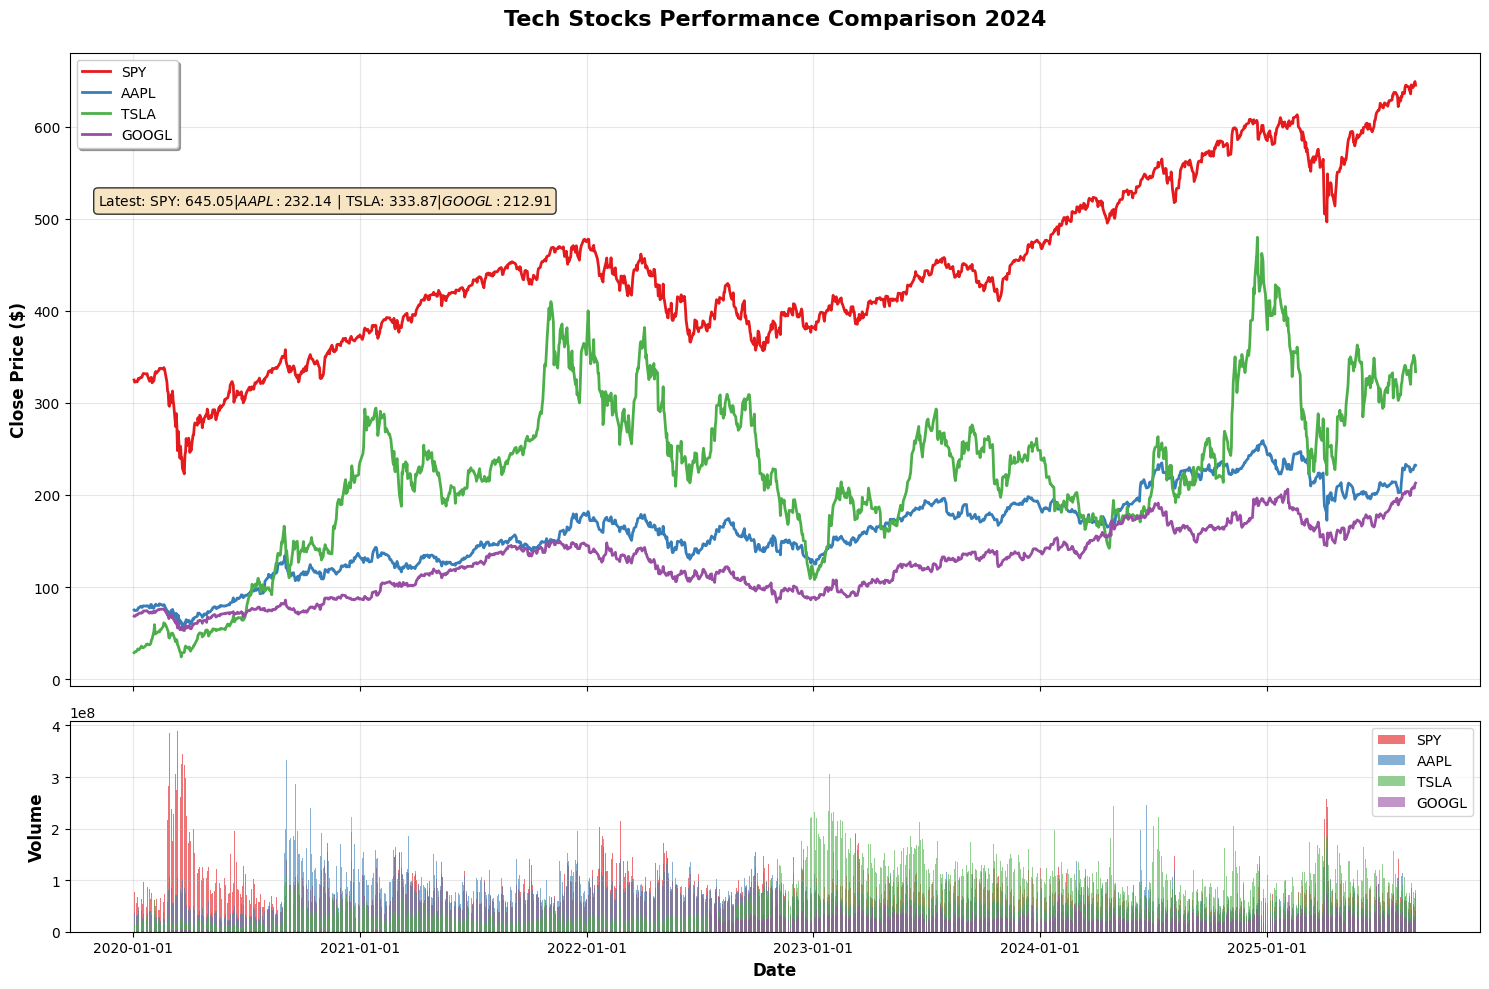

In [8]:

import matplotlib.pyplot as plt
from frontend import Frontend

# Initialize backend and frontend
frontend = Frontend()
backend = Backend(Database("data/stock_data.pkl"))

# Fetch data for multiple stocks
symbols = ['SPY', 'AAPL', 'TSLA', 'GOOGL']
dataframes = []

for symbol in symbols:
    df = backend.get_daily_price(symbol, '2020-01-01', '2025-09-01')
    dataframes.append(df)

# Create comparison plot
fig = frontend.plot_price_comparison(
    dataframes=dataframes,
    symbols=symbols,
    normalize=False,
    title='Tech Stocks Performance Comparison 2024'
)

plt.show()

# Main

In [81]:
# Chinese stock market

buy_recipe(
    1308252,
    0.05,
    {
        "SH510050": 0.75,
        "SH588000": 0.25,
    }
)

SH510050: buy 49059.450000000004
SH588000: buy 16353.150000000001


⚠️  Style 'seaborn-v0_8' not available, using default
✓ Frontend initialized with style: seaborn-v0_8
📂 Data loaded: 379556 rows
✓ Database initialized: 379556 rows from data/stock_data.pkl
✓ Backend initialized with database-only access: data/stock_data.pkl
📂 Retrieved 4082 days of data for SH510050 from database
📂 Retrieved 4222 days of data for SPY from database
📈 Plotting comparison chart for 2 symbols...

📊 Summary Statistics:
--------------------------------------------------
SH510050: Latest:  +94.3% | Min:  -14.8% | Max: +150.4% | Std:  34.2%
   SPY: Latest: +654.7% | Min:  -20.3% | Max: +659.2% | Std: 167.1%
✓ Successfully created comparison chart for 2 symbols
💡 Hover over the lines to see detailed information


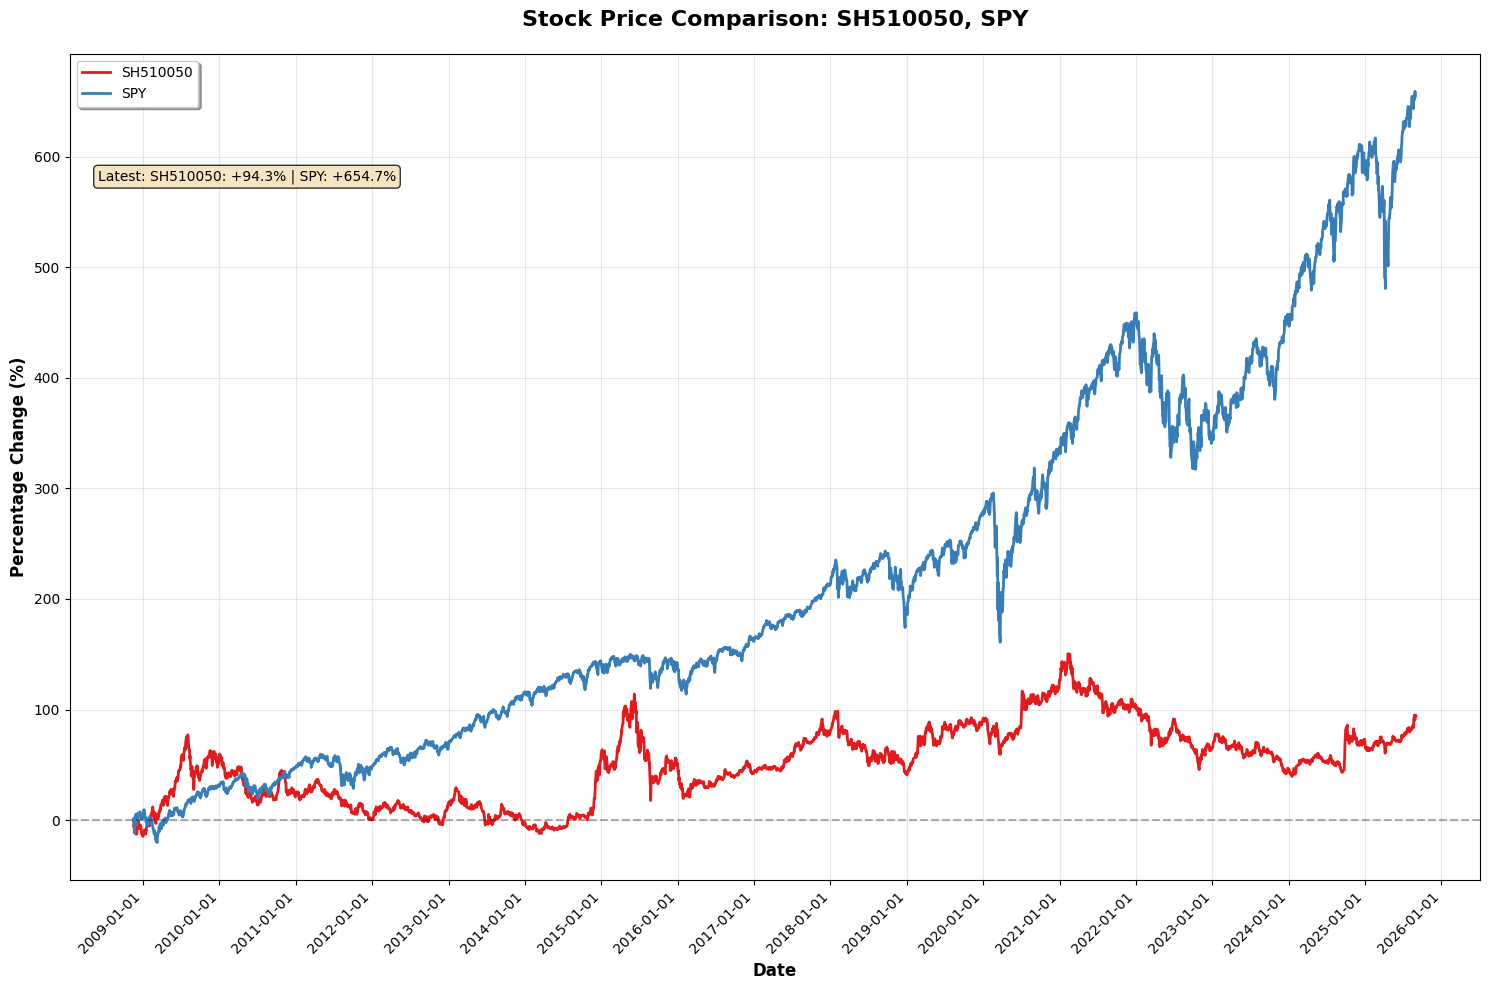

In [109]:
dfs = plot_prices(symbols=['SH510050', 'SPY'], start_date='2008-11-17', end_date='2025-09-01', normalize=True)

⚠️  Style 'seaborn-v0_8' not available, using default
✓ Frontend initialized with style: seaborn-v0_8
📂 Data loaded: 379556 rows
✓ Database initialized: 379556 rows from data/stock_data.pkl
✓ Backend initialized with database-only access: data/stock_data.pkl
📂 Retrieved 4082 days of data for SH510050 from database
📈 Plotting comparison chart for 1 symbols...

📊 Summary Statistics:
--------------------------------------------------
SH510050: Latest: $    3.11 | Min: $    1.36 | Max: $    4.01 | Avg: $    2.42
✓ Successfully created comparison chart for 1 symbols
💡 Hover over the lines to see detailed information


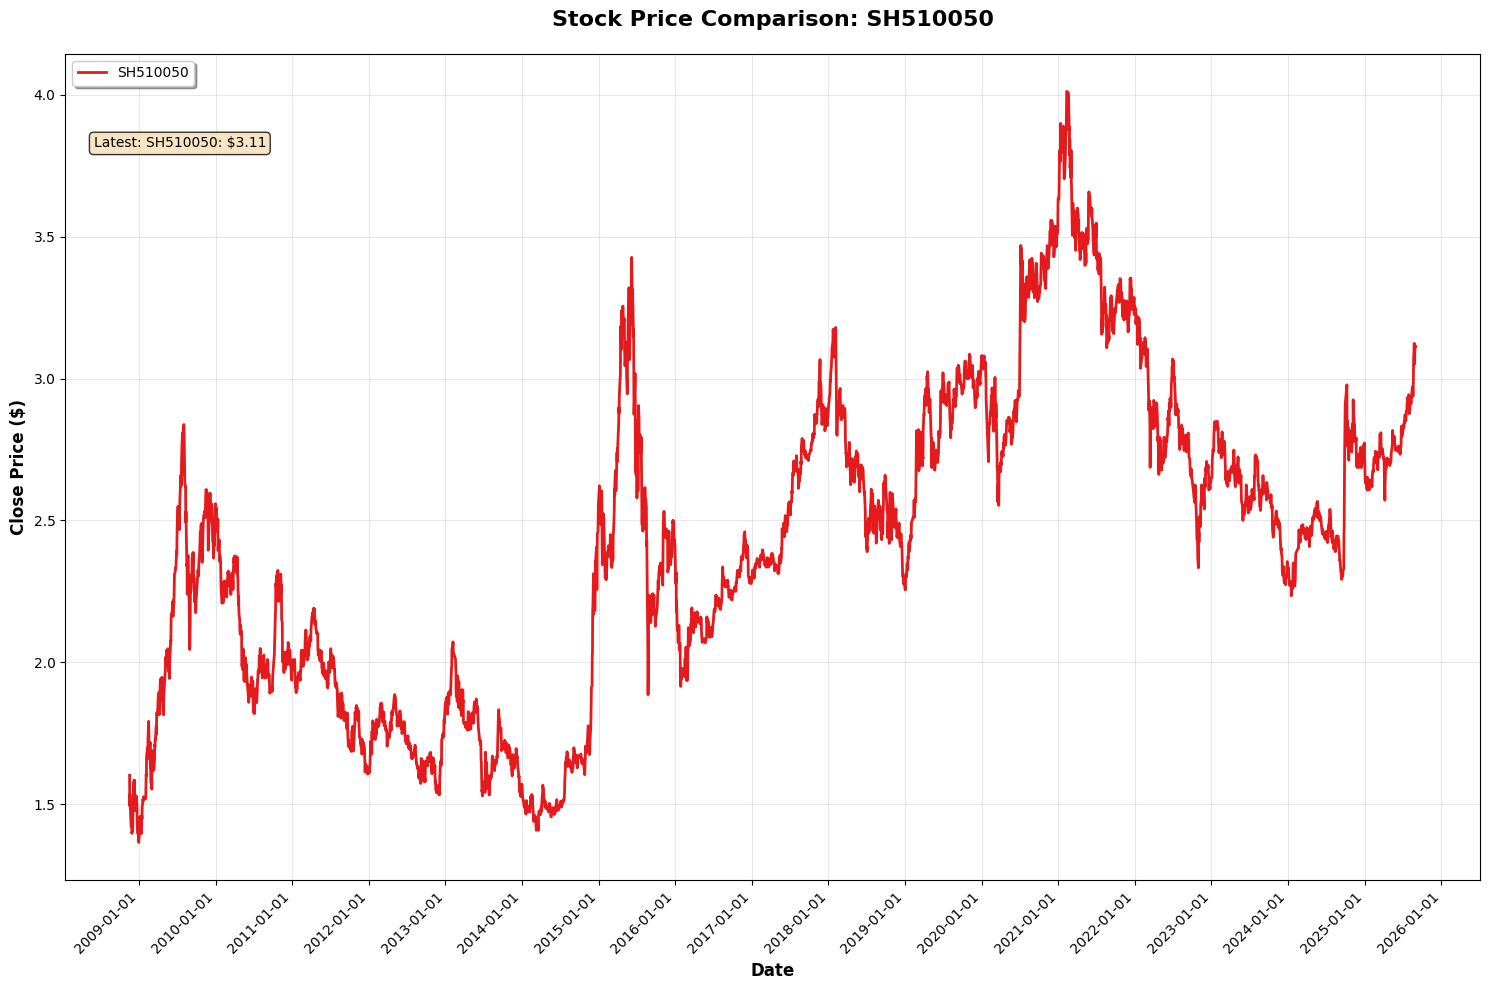

In [122]:
dfs = plot_prices(symbols=['SH510050'], start_date='2008-11-17', end_date='2025-09-01', normalize=False)

In [123]:
db = Database("data/stock_data.pkl")
spy = db.query(symbol='SPY', start_date='2000-01-01', end_date='2025-12-30')
tlt = db.query(symbol='TLT', start_date='2000-01-01', end_date='2025-12-30')

📂 Data loaded: 379556 rows
✓ Database initialized: 379556 rows from data/stock_data.pkl


In [135]:
new_df = DataFrame(spy['Close'] + tlt['Close'])
new_df['symbol'] = 'spy+tlt'
new_df

,Close,symbol
date,,
2000-01-03,NaN,spy+tlt
2000-01-04,NaN,spy+tlt
2000-01-05,NaN,spy+tlt
2000-01-06,NaN,spy+tlt
2000-01-07,NaN,spy+tlt
...,...,...
2025-09-22,755.54,spy+tlt
2025-09-23,752.53,spy+tlt
2025-09-24,750.08,spy+tlt


⚠️  Style 'seaborn-v0_8' not available, using default
✓ Frontend initialized with style: seaborn-v0_8
📈 Plotting comparison chart for 1 symbols...

📊 Summary Statistics:
--------------------------------------------------
spy+tlt: Latest: $  747.03 | Min: $  167.99 | Max: $  755.54 | Avg: $  341.72
✓ Successfully created comparison chart for 1 symbols
💡 Hover over the lines to see detailed information


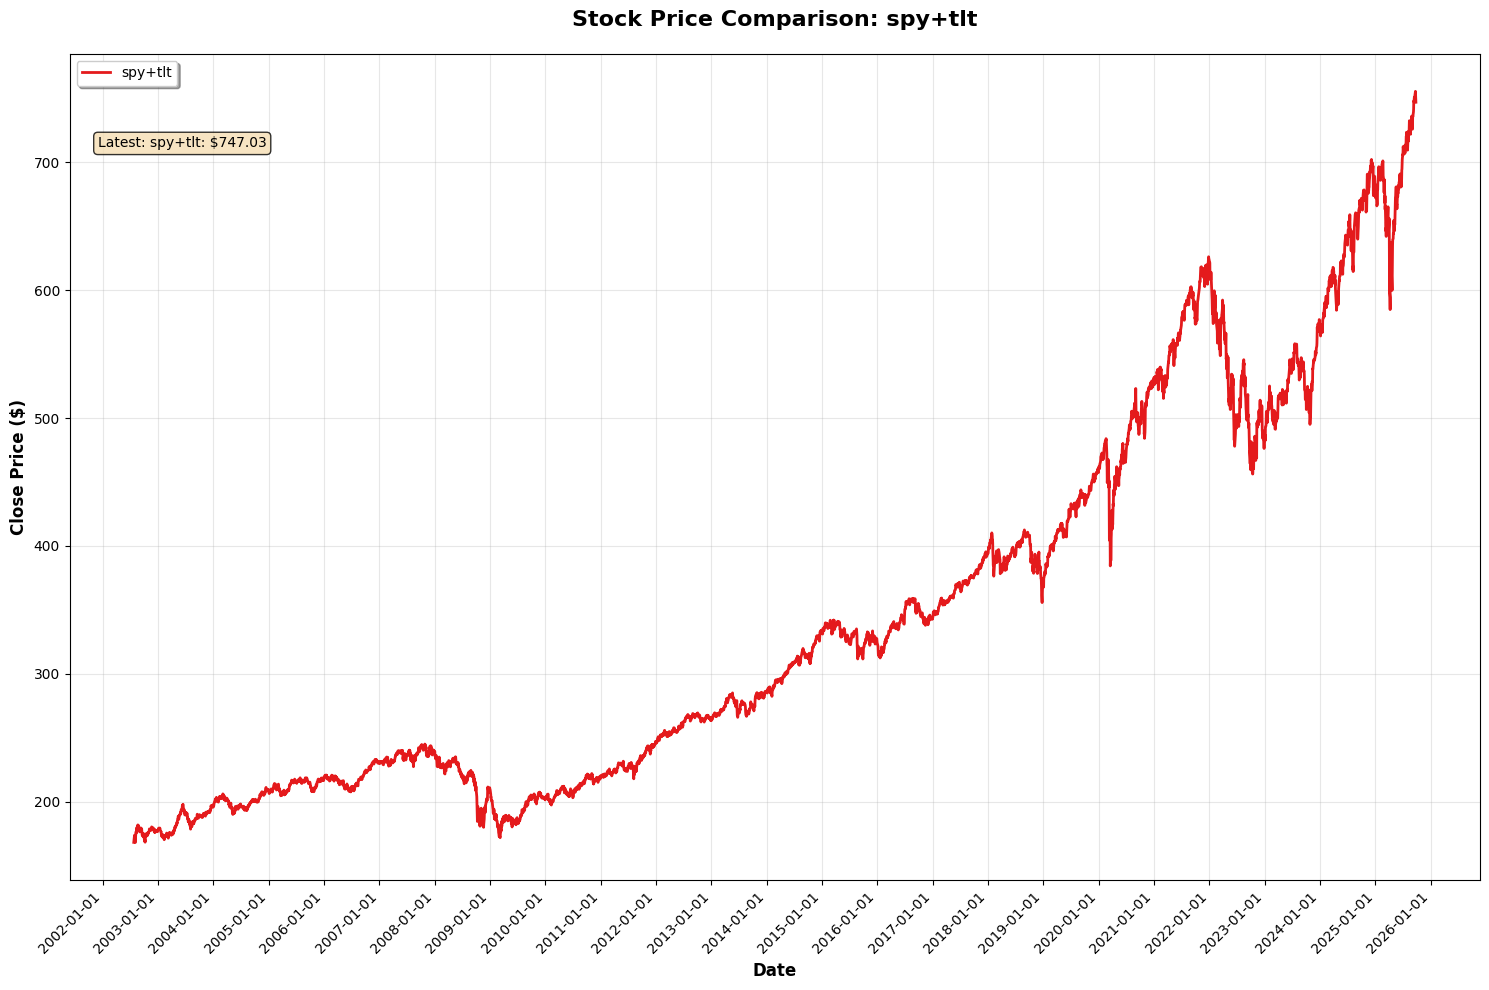

In [138]:
new_df = DataFrame(spy['Close'] + tlt['Close'])
new_df['symbol'] = 'spy+tlt'
dfs = plot_prices_simple([new_df], symbols=['spy+tlt'], start_date='2000-01-01', end_date='2025-12-31', normalize=False)